In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
g=open('C:/Users/jiang/Desktop/课件/课件整理0729/第二讲/customer_behavior.csv',encoding='utf-8')
#three_data=pd.read_csv(g)
df=pd.read_csv(g)
df.head()

,Unnamed: 0,cust_id,prod_id,group_id,be_type,day_id,buy_time
0,0,101,1305157,2520872,pv,2019-11-09 07:32:10,2019-11-09
1,1,101,1323287,3524611,pv,2019-11-12 01:30:35,2019-11-12
2,2,101,1338623,149293,pv,2019-11-07 17:00:14,2019-11-07
3,3,101,1341020,4690522,pv,2019-11-10 19:27:40,2019-11-10
4,4,101,1531134,2920577,pv,2019-11-07 06:02:12,2019-11-07


In [2]:
data=df[['cust_id','prod_id','group_id','be_type','day_id','buy_time']]

In [3]:
data1= data[(data.buy_time>='2019-11-05')&(data.buy_time<='2019-11-13')]

In [4]:
len(data)

10224104

In [5]:
len(data1)

10218544

In [6]:
data1.head()

,cust_id,prod_id,group_id,be_type,day_id,buy_time
0,101,1305157,2520872,pv,2019-11-09 07:32:10,2019-11-09
1,101,1323287,3524611,pv,2019-11-12 01:30:35,2019-11-12
2,101,1338623,149293,pv,2019-11-07 17:00:14,2019-11-07
3,101,1341020,4690522,pv,2019-11-10 19:27:40,2019-11-10
4,101,1531134,2920577,pv,2019-11-07 06:02:12,2019-11-07


In [7]:
data1.shape

(10218544, 6)

In [8]:
data1['be_type'].drop_duplicates()

0        pv
60      fav
100     buy
271    cart
Name: be_type, dtype: object

In [9]:
data1.dtypes

cust_id      int64
prod_id      int64
group_id     int64
be_type     object
day_id      object
buy_time    object
dtype: object

In [10]:
data1.isnull().any()

cust_id     False
prod_id     False
group_id    False
be_type     False
day_id      False
buy_time    False
dtype: bool

In [11]:
import time
from datetime import datetime,timedelta,date

In [12]:
data1['day_id']=pd.to_datetime(data1['day_id'],format='%Y-%m-%d')

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
data1['month']=data1['day_id'].dt.month
data1['buy_time']=data1['day_id'].dt.date
data1['times']=data1['day_id'].dt.time
data1['hours']=data1['day_id'].dt.hour
data1['weekday']=data1['day_id'].dt.dayofweek+1

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [14]:
data1.head()

,cust_id,prod_id,group_id,be_type,day_id,buy_time,month,times,hours,weekday
0,101,1305157,2520872,pv,2019-11-09 07:32:10,2019-11-09,11,07:32:10,7,6
1,101,1323287,3524611,pv,2019-11-12 01:30:35,2019-11-12,11,01:30:35,1,2
2,101,1338623,149293,pv,2019-11-07 17:00:14,2019-11-07,11,17:00:14,17,4
3,101,1341020,4690522,pv,2019-11-10 19:27:40,2019-11-10,11,19:27:40,19,7
4,101,1531134,2920577,pv,2019-11-07 06:02:12,2019-11-07,11,06:02:12,6,4


In [15]:
behavior_count=data1.groupby('be_type')['cust_id'].count()

In [16]:
behavior_count.head()

be_type
buy      203458
cart     567531
fav      302497
pv      9145058
Name: cust_id, dtype: int64

In [17]:
PV=behavior_count['pv']
print("PV=%d"%PV)
UV=len(data['cust_id'].unique())
print("UV=%d"%UV)
print("平均访问量 PV/UV=%d"%(PV/UV))

PV=9145058
UV=100000
平均访问量 PV/UV=91


In [18]:
data_pv=data1.loc[data1['be_type']=='pv',['cust_id']]   
data_fav=data1.loc[data1['be_type']=='fav',['cust_id']]
data_cart=data1.loc[data1['be_type']=='cart',['cust_id']]
data_buy=data1.loc[data1['be_type']=='buy',['cust_id']]
#集合相减，获取只有点击行为的用户数
data_pv_only=set(data_pv['cust_id'])-set(data_fav['cust_id'])-set(data_cart['cust_id'])-set(data_buy['cust_id'])
pv_only=len(data_pv_only)
print('跳失率为：%.2f%%'%(pv_only/UV*100))

跳失率为：5.91%


In [19]:
pv_day= data1[data1.be_type=='pv'].groupby('buy_time')['be_type'].count()

In [20]:
pv_day

buy_time
2019-11-05     957020
2019-11-06     973800
2019-11-07     915255
2019-11-08     896779
2019-11-09     937196
2019-11-10     949846
2019-11-11     995060
2019-11-12    1265050
2019-11-13    1255052
Name: be_type, dtype: int64

In [21]:
uv_day=data1[data1.be_type=='pv'].drop_duplicates(['cust_id','buy_time']).groupby('buy_time')['cust_id'].count()

In [22]:
uv_day

buy_time
2019-11-05    69349
2019-11-06    70190
2019-11-07    69450
2019-11-08    69536
2019-11-09    70182
2019-11-10    71558
2019-11-11    72542
2019-11-12    95068
2019-11-13    94874
Name: cust_id, dtype: int64

In [23]:
attr = pv_day.index

In [24]:
attr 

Index([2019-11-05, 2019-11-06, 2019-11-07, 2019-11-08, 2019-11-09, 2019-11-10,
       2019-11-11, 2019-11-12, 2019-11-13],
      dtype='object', name='buy_time')

In [25]:
v1 = pv_day.values
v2 = uv_day.values

In [26]:
v1

array([ 957020,  973800,  915255,  896779,  937196,  949846,  995060,
       1265050, 1255052], dtype=int64)

In [29]:
v2

array([69349, 70190, 69450, 69536, 70182, 71558, 72542, 95068, 94874],
      dtype=int64)

In [27]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

Text(0, 0.5, 'PV')

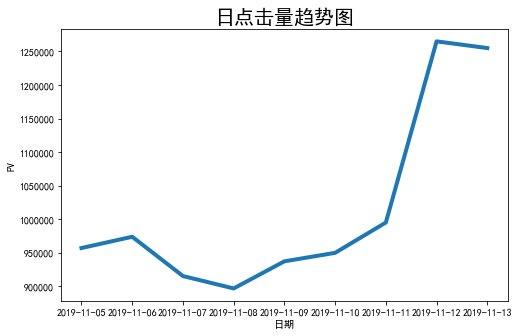

In [28]:
#设置线宽
plt.figure(figsize=(8, 5))
plt.plot(attr,v1,linewidth=4)
#设置图表标题，并给坐标轴添加标签
plt.title("日点击量趋势图",fontsize=20)
plt.xlabel('日期',fontsize=10)
plt.ylabel('PV',fontsize=10)

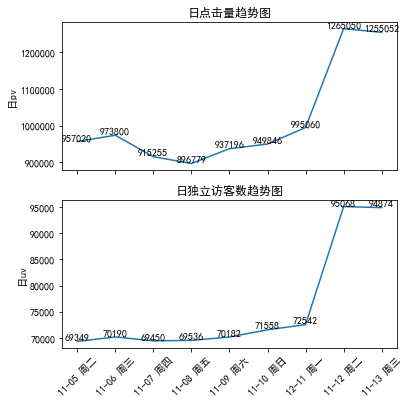

In [23]:
#折线图绘制
fig = plt.figure(figsize=(6,6))      
plt.subplot(2,1,1)  
xlabel=attr
plt.plot(range(len(xlabel)),v1)   
plt.xticks(np.arange(9),'')  
plt.title('日点击量趋势图')
plt.ylabel('日pv')
for a,b in zip(range(len(xlabel)),v1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)   
plt.subplot(2,1,2)
plt.plot(range(len(xlabel)),v2) 
plt.xticks(np.arange(9),('11-05 周二','11-06 周三','11-07 周四','11-08 周五','11-09 周六','11-10 周日','12-11 周一','11-12 周二','11-13 周三'),rotation=45)
plt.title('日独立访客数趋势图')
plt.ylabel('日uv')
for a,b in zip(range(len(xlabel)),v2):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
plt.show()

In [29]:
pv_hour=data1.groupby('hours')['cust_id'].count().reset_index().rename(columns={'用户ID':'pv'})
uv_hour=data1.groupby('hours')['cust_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'用户ID':'时uv'})

In [30]:
pv_hour.head()

,hours,cust_id
0,0,342716
1,1,155172
2,2,84458
3,3,57846
4,4,49128


Text(0.5, 1.0, '按小时独立访客数趋势图')

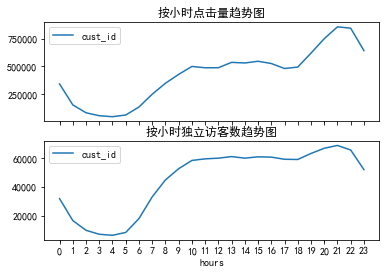

In [31]:
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hours',y='cust_id',ax=axes[0])
uv_hour.plot(x='hours',y='cust_id',ax=axes[1])
plt.xticks(range(24),np.arange(24))
axes[0].set_title('按小时点击量趋势图')
axes[1].set_title('按小时独立访客数趋势图')

In [32]:
def cal_retention(data,n): #n为n日留存
    user=[]
    date=pd.Series(data.buy_time.unique()).sort_values()[:-n] #时间截取至最后一天的前n天
    retention_rates=[]
    for i in date:
        new_user=set(data[data.buy_time==i].cust_id.unique())-set(user) #识别新用户，本案例中设初始用户量为零
        user.extend(new_user)  #将新用户加入用户群中
        #第n天留存情况
        user_nday=data[data.buy_time==i+timedelta(n)].cust_id.unique() #第n天登录的用户情况
        a=0
        for cust_id in user_nday:
            if cust_id in new_user:
                a+=1
        retention_rate=a/len(new_user) #计算该天第n日留存率
        retention_rates.append(retention_rate) #汇总n日留存数据
    data_retention=pd.Series(retention_rates,index=date)
    return data_retention

data_retention=cal_retention(data1,3)  #求用户的3日留存情况

In [33]:
data_retention

2019-11-05    0.758306
2019-11-06    0.659058
2019-11-07    0.644157
2019-11-08    0.669378
2019-11-09    0.966176
2019-11-10    0.951292
dtype: float64

In [34]:
from pyecharts import Line, Bar, Overlap
day_buy_user_num = data1[data1.be_type == 'buy'].drop_duplicates(['cust_id', 'buy_time']).groupby('buy_time')['cust_id'].count()
day_active_user_num = data1.drop_duplicates(['cust_id', 'buy_time']).groupby('buy_time')['cust_id'].count()
day_buy_rate = day_buy_user_num / day_active_user_num
attr = day_buy_user_num.index
v1 = day_buy_user_num.values
v2 = day_buy_rate.values

Text(0, 0.5, 'PV')

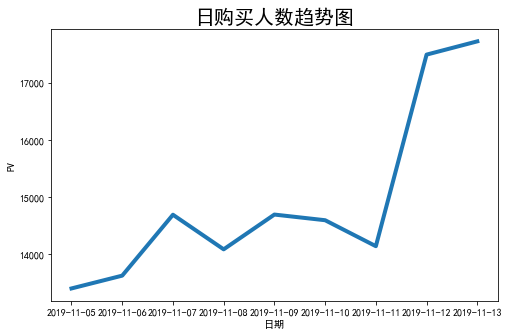

In [35]:
#设置线宽
plt.figure(figsize=(8, 5))
plt.plot(attr,v1,linewidth=4)
#设置图表标题，并给坐标轴添加标签
plt.title("日购买人数趋势图",fontsize=20)
plt.xlabel('日期',fontsize=10)
plt.ylabel('PV',fontsize=10)

Text(0, 0.5, 'PV')

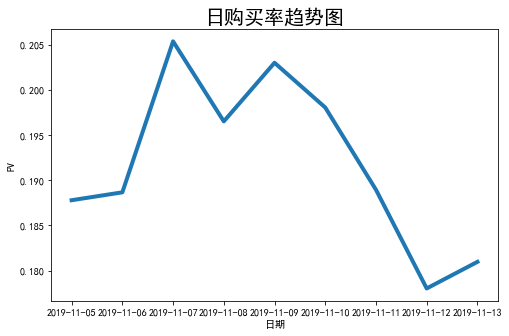

In [36]:
#设置线宽
plt.figure(figsize=(8, 5))
plt.plot(attr,v2,linewidth=4)
#设置图表标题，并给坐标轴添加标签
plt.title("日购买率趋势图",fontsize=20)
plt.xlabel('日期',fontsize=10)
plt.ylabel('PV',fontsize=10)

In [37]:
df_rebuy = data1[data1.be_type == 'buy'].drop_duplicates(['cust_id', 'day_id']).groupby('cust_id')['day_id'].count()
df_rebuy[df_rebuy >= 2].count() / df_rebuy.count()

0.6357834539478533

In [43]:
data_AARR=data1.groupby('be_type')['cust_id'].count()
#点击量
pv_value=data_AARR['pv']
#收藏量
fav_value=data_AARR['fav']
#加购量
cart_value=data_AARR['cart']
#购买量
buy_value=data_AARR['buy']
##计算转化率，此处由于实际业务中用户收藏和加购没有先后顺序，所以二者合并后计算转化率
#收藏加购转化率
f_c_value=fav_value+cart_value
f_c_ratio=f_c_value/pv_value
print('收藏加购转化率为:%.2f%%'%(f_c_ratio*100))
#购买转化率
buy_ratio=buy_value/pv_value
print('购买转化率为:%.2f%%'%(buy_ratio*100))


收藏加购转化率为:9.51%
购买转化率为:2.22%


In [44]:
from pyecharts import Funnel
pv_users = data1[data1.be_type == 'pv']['cust_id'].count()
fav_users = data1[data1.be_type == 'fav']['cust_id'].count()
cart_users =data1[data1.be_type == 'cart']['cust_id'].count()
buy_users = data1[data1.be_type == 'buy']['cust_id'].count()
attr = ['点击', '加入购物车', '收藏', '购买']
values = [np.around((pv_users / pv_users * 100), 2),
         np.around((cart_users / pv_users * 100), 2),
         np.around((fav_users / pv_users * 100), 2),
         np.around((buy_users / pv_users * 100), 2)]


In [14]:
funnel1 = Funnel('总体转化漏斗图', title_pos='center')
funnel1.add(name='环节',  # 指定图例名称
            attr=attr,  # 指定属性名称
            value=values,  # 指定属性所对应的值
            is_label_show=True,  # 确认显示标签
            label_formatter='{c}'+'%',  # 指定标签显示的方式
            legend_top='bottom',    # 指定图例位置，为避免遮盖选择右下展示
            # pyecharts包的文档中指出，当label_formatter='{d}'时,标签以百分比的形式显示.
            # 但我这样做的时候,发现显示的百分比与原始数据对应不上,只好用上面那种显示形式

            label_pos='outside',  # 指定标签的位置,inside,outside
            legend_orient='vertical',  # 指定图例显示的方向
            legend_pos='right')  # 指定图例的位置

funnel1.render_notebook()

E:\anaconda\lib\site-packages\pyecharts\base.py:176: UserWarning: Implementation has been removed. Please pass the chart instance directly to Jupyter.If you need more help, please read documentation
  + "If you need more help, please read documentation"


In [30]:
import seaborn as sns

In [50]:
product_buy=data1.loc[data1['be_type']=='buy',['cust_id','group_id']]
product_buy_count=product_buy.groupby('group_id')['cust_id'].count().rename('销售次数')

In [52]:
product_buy_count=pd.DataFrame(product_buy_count) 

In [53]:
product_buy_count=product_buy_count.sort_values(by='销售次数',axis=0,ascending = False)

In [54]:
product_buy_count=product_buy_count.iloc[:10,:]
product_buy_count

,销售次数
group_id,
1464217,3681
2735567,3630
4145914,3282
2885743,3165
4756206,3032
4801527,2725
983027,2533
1320394,1804
4159173,1802


In [55]:
product_pv=data1.loc[data1['be_type']=='pv',['cust_id','group_id']]
product_pv_count=product_pv.groupby('group_id')['cust_id'].count().rename('点击次数')
product_pv_count=pd.DataFrame(product_pv_count)   
product_pv_count=product_pv_count.sort_values(by='点击次数',axis=0,ascending = False)
product_pv_count=product_pv_count.iloc[:10,:]
product_pv_count

,点击次数
group_id,
4756206,490366
4145914,334181
2355173,328051
3607462,304453
983027,286615
2520478,204187
4801527,196441
1320394,183155
2465437,159394


In [56]:
item_behavior=data.groupby(['group_id','be_type'])['cust_id'].count().unstack(1).rename(columns={'pv':'点击量','fav':'收藏量','cart':'加购量','buy':'购买量'}).fillna(0)
item_behavior.head()
item_behavior['转化率']=item_behavior['购买量']/item_behavior['点击量']
item_behavior.head()

be_type,购买量,加购量,收藏量,点击量,转化率
group_id,,,,,
2272,12.0,14.0,8.0,118.0,0.101695
2511,1.0,4.0,2.0,87.0,0.011494
2919,2.0,0.0,0.0,3.0,0.666667
3680,0.0,0.0,0.0,10.0,0.000000
5008,0.0,5.0,0.0,25.0,0.000000


In [57]:
top=pd.concat([product_buy_count,product_pv_count],axis=1,sort=False)
top

,销售次数,点击次数
group_id,,
983027,2533.0,286615.0
1320394,1804.0,183155.0
1464217,3681.0,NaN
2355173,NaN,328051.0
2465437,NaN,159394.0
2520478,NaN,204187.0
2735567,3630.0,NaN
2885743,3165.0,NaN
3002662,1802.0,149539.0
